# Analysis on Three Word Single-shot classification problem

---
author: Giovanni Foletto
date: June, 2024
---

We can setup the project, with the needed functions, libraries and import the data in a useful-kind of object.

After that, we can see that each element has been importet without any problems (15000 in, 15000 out), how the data are
created and disposed in the dataframe, some kind of initial information about data distributions and numerical analysis 
and at the end, the used data-model.

In [ ]:
import polars as pl
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = []

with open("../data/prepared/zero_shot_classification/result_1.txt", "r") as of:
	lines = of.readlines()
	for line in lines:
		oj = json.loads(line)

		#print(oj.keys()) # dict_keys(['sequence', 'labels', 'scores'])
		oj["sequence"] = json.loads(oj["sequence"]) 
		oj["undecided"] = oj["scores"][oj["labels"].index("undecided")] # ["undecided", "malicious", "benign"]
		oj["malicious"] = oj["scores"][oj["labels"].index("malicious")]
		oj["benign"] = oj["scores"][oj["labels"].index("benign")]

		oj["max_value"] = max(oj["scores"])
		oj["output"] = oj["labels"][oj["scores"].index(oj["max_value"])]
		
		data.append(oj)

len(data)

15000

In [27]:
df = pl.DataFrame(data)
df.head(2)

sequence,labels,scores,undecided,malicious,benign,max_value,output
struct[1],list[str],list[f64],f64,f64,f64,f64,str
"{""{""userAgent"": ""Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-157-generic Botocore/1.12.201"", ""eventID"": ""a43253b3-49d8-4314-b983-a22f4d2703ac"", ""errorMessage"": ""Request limit exceeded."", ""userIdentity"": {""type"": ""IAMUser"", ""principalId"": ""AIDADO2GQD0K8TEF7KW1V"", ""arn"": ""arn:aws:iam::811596193553:user/Level6"", ""accountId"": ""811596193553"", ""accessKeyId"": ""ASIAZ6XVDR2PA984G89L"", ""userName"": ""Level6"", ""sessionContext"": {""attributes"": {""mfaAuthenticated"": ""false"", ""creationDate"": ""2019-08-21T07:41:19Z""}}}, ""eventType"": ""AwsApiCall"", ""errorCode"": ""Client.RequestLimitExceeded"", ""sourceIPAddress"": ""5.205.62.253"", ""eventName"": ""RunInstances"", ""eventSource"": ""ec2.amazonaws.com"", ""recipientAccountId"": ""811596193553"", ""requestParameters"": {""instancesSet"": {""items"": [{""imageId"": ""ami-6eac42df5b70d2c07"", ""minCount"": 1, ""maxCount"": 10}]}, ""userData"": ""<sensitiveDataRemoved>"", ""instanceType"": ""p2.16xlarge"", ""blockDeviceMapping"": {}, ""monitoring"": {""enabled"": false}, ""disableApiTermination"": true, ""tagSpecificationSet"": {""items"": [{""resourceType"": ""instance"", ""tags"": [{""key"": ""my_ec2_key"", ""value"": ""my_a_val""}]}]}}, ""awsRegion"": ""eu-west-3"", ""requestID"": ""a97286-9d47-49ca-8aaf-813faa9f1772"", ""responseElements"": null, ""eventVersion"": ""1.05"", ""eventTime"": ""2019-08-21T23:31:24Z""} ""}","[""undecided"", ""malicious"", ""benign""]","[0.795721, 0.127998, 0.076281]",0.795721,0.127998,0.076281,0.795721,"""undecided"""
"{""{""userAgent"": ""Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-157-generic Botocore/1.12.201"", ""eventID"": ""e76de730-8c84-4f01-9abd-32b877f71c28"", ""errorMessage"": ""Request limit exceeded."", ""userIdentity"": {""type"": ""IAMUser"", ""principalId"": ""AIDA9BO36HFBHKGJAO9C1"", ""arn"": ""arn:aws:iam::811596193553:user/backup"", ""accountId"": ""811596193553"", ""accessKeyId"": ""AKIA01U43UX3RBRDXF4Q"", ""userName"": ""backup""}, ""eventType"": ""AwsApiCall"", ""errorCode"": ""Client.RequestLimitExceeded"", ""sourceIPAddress"": ""5.205.62.253"", ""eventName"": ""RunInstances"", ""eventSource"": ""ec2.amazonaws.com"", ""recipientAccountId"": ""811596193553"", ""requestParameters"": {""instancesSet"": {""items"": [{""imageId"": ""ami-1b8bd60920c56e886"", ""minCount"": 1, ""maxCount"": 10}]}, ""userData"": ""<sensitiveDataRemoved>"", ""instanceType"": ""h1.8xlarge"", ""blockDeviceMapping"": {}, ""monitoring"": {""enabled"": false}, ""disableApiTermination"": true, ""tagSpecificationSet"": {""items"": [{""resourceType"": ""instance"", ""tags"": [{""key"": ""my_ec2_key"", ""value"": ""my_a_val""}]}]}}, ""awsRegion"": ""ap-southeast-1"", ""requestID"": ""3ba679a2-ddc2-4559-a839-d5969df6d5dc"", ""responseElements"": null, ""eventVersion"": ""1.05"", ""eventTime"": ""2019-08-21T14:15:28Z""} ""}","[""undecided"", ""benign"", ""malicious""]","[0.794392, 0.107414, 0.098194]",0.794392,0.098194,0.107414,0.794392,"""undecided"""


In [30]:
df.describe()

statistic,sequence,labels,scores,undecided,malicious,benign,max_value,output
str,f64,f64,f64,f64,f64,f64,f64,str
"""count""",15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,"""15000"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",null,null,null,0.710042,0.14499,0.144968,0.711823,null
"""std""",null,null,null,0.182154,0.080772,0.105572,0.17874,null
"""min""",null,null,null,0.251326,0.031416,0.025201,0.333451,"""benign"""
"""25%""",null,null,null,0.736932,0.097757,0.073231,0.736932,null
"""50%""",null,null,null,0.782085,0.112673,0.104847,0.782085,null
"""75%""",null,null,null,0.822661,0.145361,0.132741,0.822661,null
"""max""",null,null,null,0.943383,0.39466,0.609151,0.943383,"""undecided"""


In [29]:
df.schema

OrderedDict([('sequence', Struct({'column_0': String})),
             ('labels', List(String)),
             ('scores', List(Float64)),
             ('undecided', Float64),
             ('malicious', Float64),
             ('benign', Float64),
             ('max_value', Float64),
             ('output', String)])

## Study of the Models and Distributions

We can now study:

- first the distribution of the single things taken alone ("undefined", "malicious" and "benign").
- after that, we elaborate on the scatterplot/pairplot

<Axes: ylabel='undecided'>

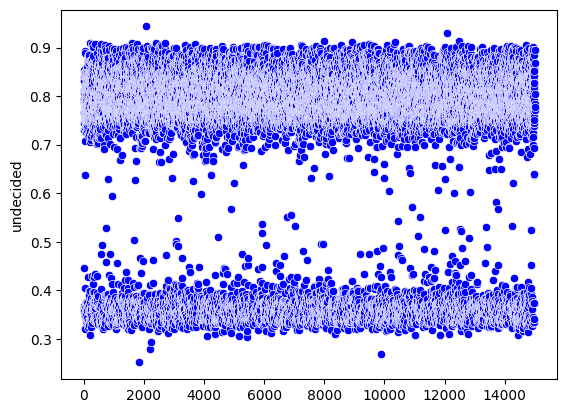

In [35]:
sns.scatterplot(data=df.to_pandas()["undecided"], color="blue")

<Axes: ylabel='malicious'>

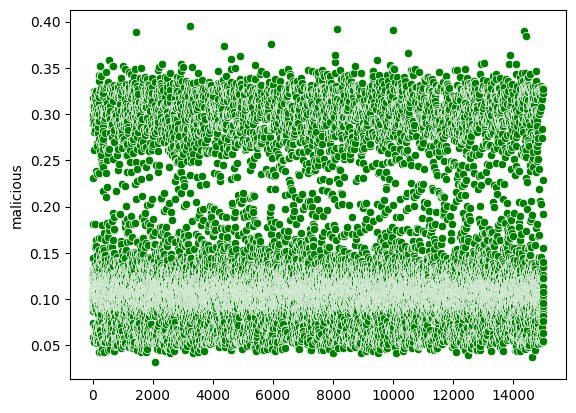

In [34]:
sns.scatterplot(data=df.to_pandas()["malicious"], color="green")

<Axes: ylabel='benign'>

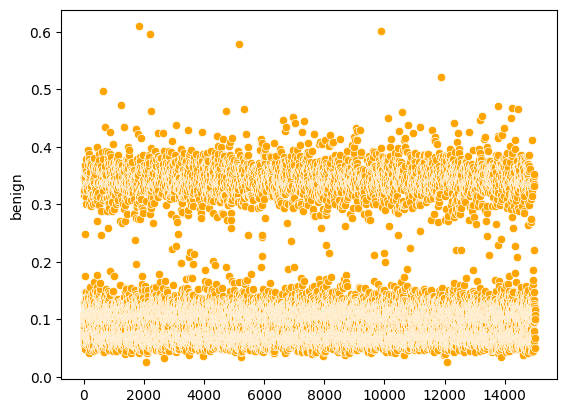

In [31]:
sns.scatterplot(data=df.to_pandas()["benign"], color="orange")

We can now see and read how much value are the output represented. Before, we can see the table of the three possibilities, and after that the plot of the distribution of samples.

In [14]:
df["output"].value_counts()

output,count
str,u32
"""benign""",1119
"""malicious""",54
"""undecided""",13827


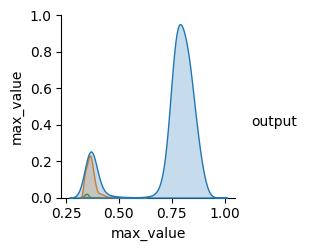

In [15]:
sns.pairplot(data=df.select("output", "max_value").to_pandas(), hue="output")

With this plot, we can see some interesting things: 

- the "undecided" output has a median value on around 80%, instead of the "malicious" and the "benign" are around 30%.
- the point of interest is the quadrant (0.40, 0.40), in which are concentrated the output equal to "malicious" and "benign".
	- this clearly tells us a *important story*: when some kind of decision is taken, is never certain, since it always resides around 33%. The three components have 
	not a absolute majority able to make some sort of decision.
	- we can see this better in the second distribution plot: we have a majority of "undecided" around 80%, but around 33$ we have likely the same number of peaks and samples.

Answer: the model **cannot** make a decision.

After that, there are the three single distribution for each of the three possible outputs, the hist-plot of the occurences in the output section.

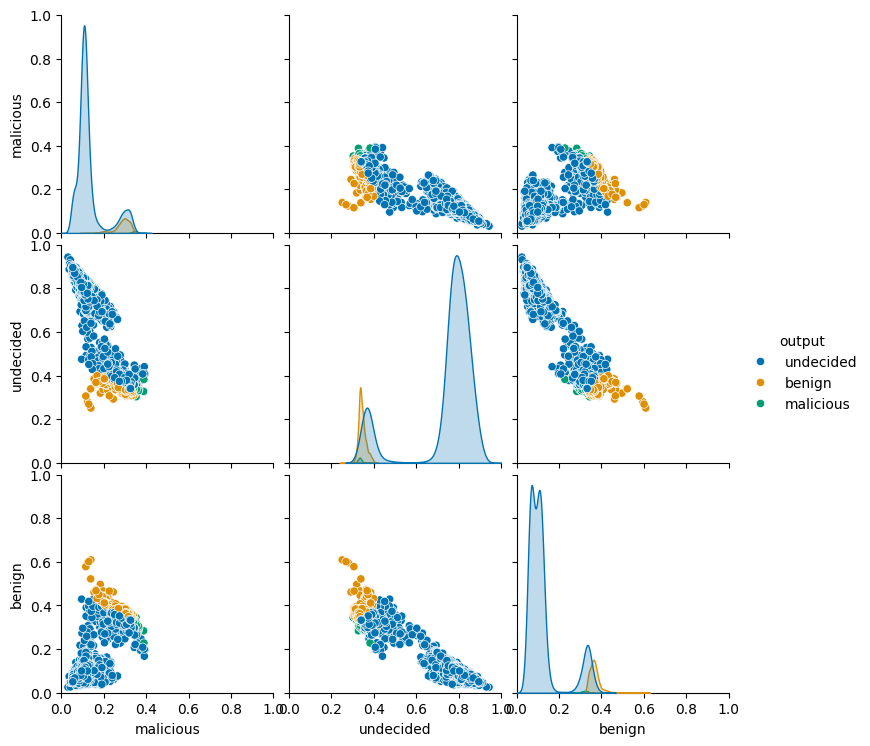

In [25]:
sns_big_pairplot = sns.pairplot(
	data=df.select("malicious", "undecided", "benign", "output").to_pandas(), 
	hue="output", 
	diag_kind="kde", 
	palette=sns.color_palette("colorblind", n_colors=3))
sns_big_pairplot.set(xlim=(0,1), ylim=(0, 1))
print(sns_big_pairplot)

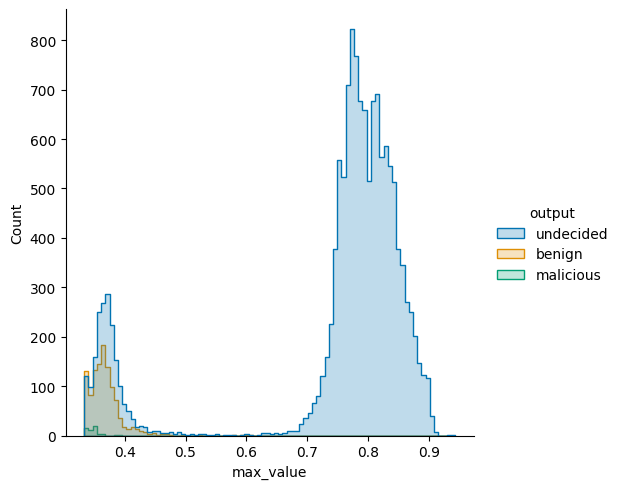

In [39]:
sns.displot(data=df.to_pandas(), x="max_value", hue="output", element="step", palette=sns.color_palette("colorblind", n_colors=3))

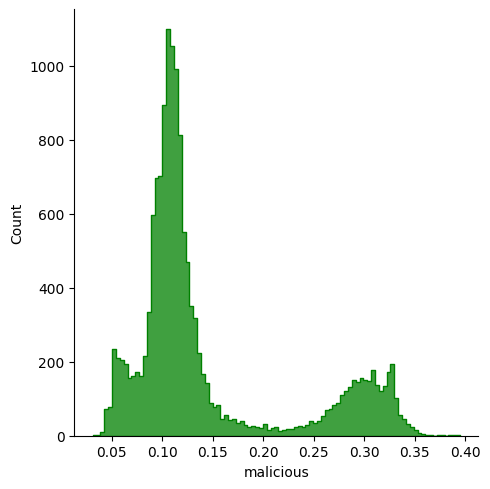

In [23]:
sns.displot(data=df.to_pandas(), x="malicious", element="step", color="green")

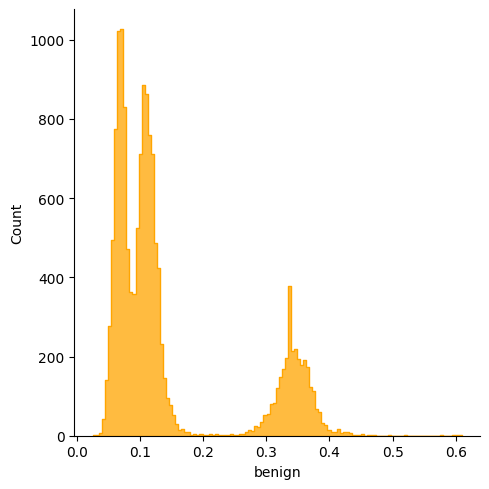

In [24]:
sns.displot(data=df.to_pandas(), x="benign", element="step", color="orange")

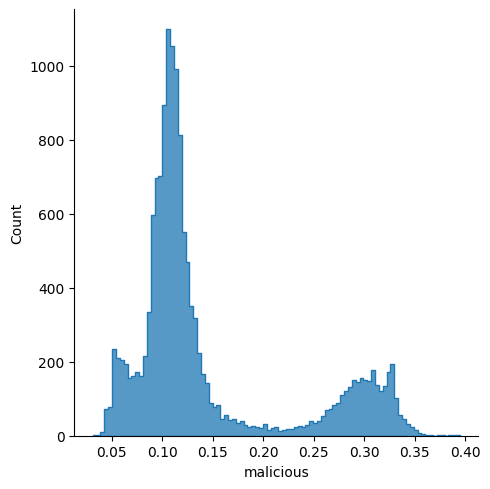

In [25]:
sns.displot(data=df.to_pandas(), x="malicious", element="step")

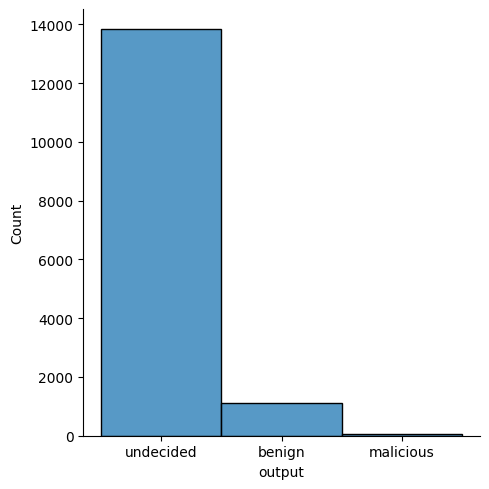

In [26]:
sns.displot(data=df["output"].to_pandas(), discrete=True)

## Analysis on what "benign" and "malicious" logs contains

This has only been made for "malicious" and "benign", and cover only "errorMessage" fuse.
There are some interesting thing here, too. The logs classified as benign or malicious report the same kind of logs ("you are not authorized to perform this operation"). At the end, being malicious or benign, is the same for the model.

In [31]:
mal_find.select(pl.col("errorMessage").unique())

errorMessage
str
"""You are not au…"


In [32]:
ben_find = df.filter(
		pl.col("output") == "benign"
	).select("sequence").unnest("sequence").rename({
    	"column_0": "decoded"
	}).to_numpy()

with open("../data/prepared/zero_shot_classification/ben_find.ndjson", "w") as mf:
	for i in ben_find:
		json.dump(json.loads(i[0]), mf)
		mf.write("\n")

ben_find = pl.read_ndjson("../data/prepared/zero_shot_classification/ben_find.ndjson")
ben_find.head()

userAgent,eventID,errorMessage,userIdentity,eventType,errorCode,sourceIPAddress,eventName,eventSource,recipientAccountId,requestParameters,awsRegion,requestID,responseElements,eventVersion,eventTime,sharedEventID,resources
str,str,str,struct[8],str,str,str,str,str,str,struct[9],str,str,struct[2],str,str,str,list[struct[3]]
"""Boto3/1.9.201 …","""b955fda0-ba9f-…","""You are not au…","{""IAMUser"",""AIDA9BO36HFBHKGJAO9C1"",""arn:aws:iam::811596193553:user/backup"",""811596193553"",""AKIA01U43UX3RBRDXF4Q"",""backup"",{{null},{null},{null,null}},null}","""AwsApiCall""","""Client.Unautho…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""811596193553""","{{[{""ami-c5b0fcbe5ec32f179"",1,10}]},""<sensitiveDataRemoved>"",""d2.xlarge"",{null},{false},true,{[{""instance"",[{""my_ec2_key"",""my_a_val""}]}]},null,null}","""eu-west-1""","""7a4b6973-239c-…","{{null,null,null},{null,null}}","""1.05""","""2019-08-22T07:…",null,null
"""Boto3/1.9.201 …","""a06035b-27c2-4…","""You are not au…","{""IAMUser"",""AIDADO2GQD0K8TEF7KW1V"",""arn:aws:iam::811596193553:user/Level6"",""811596193553"",""AKIA3Z2XBVUDFQ9TU4MD"",""Level6"",{{null},{null},{null,null}},null}","""AwsApiCall""","""Client.Unautho…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""811596193553""","{{[{""ami-c5b0fcbe5ec32f179"",1,10}]},""<sensitiveDataRemoved>"",""r5d.large"",{null},{false},true,{[{""instance"",[{""my_ec2_key"",""my_a_val""}]}]},null,null}","""eu-west-1""","""f227d3bf-c9cc-…","{{null,null,null},{null,null}}","""1.05""","""2019-08-23T04:…",null,null
"""Boto3/1.9.201 …","""e27993-5a7d-49…","""You are not au…","{""IAMUser"",""AIDADO2GQD0K8TEF7KW1V"",""arn:aws:iam::811596193553:user/Level6"",""811596193553"",""AKIA3Z2XBVUDFQ9TU4MD"",""Level6"",{{null},{null},{null,null}},null}","""AwsApiCall""","""Client.Unautho…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""811596193553""","{{[{""ami-6df81d788d99785d5"",1,10}]},""<sensitiveDataRemoved>"",""d2.2xlarge"",{null},{false},true,{[{""instance"",[{""my_ec2_key"",""my_a_val""}]}]},null,null}","""us-west-2""","""68f7aca3-1a7d-…","{{null,null,null},{null,null}}","""1.05""","""2019-08-23T01:…",null,null
"""Boto3/1.9.201 …","""b865653e1-8733…","""You are not au…","{""IAMUser"",""AIDADO2GQD0K8TEF7KW1V"",""arn:aws:iam::811596193553:user/Level6"",""811596193553"",""AKIA3Z2XBVUDFQ9TU4MD"",""Level6"",{{null},{null},{null,null}},null}","""AwsApiCall""","""Client.Unautho…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""811596193553""","{{[{""ami-a4193aaec48b42f57"",1,10}]},""<sensitiveDataRemoved>"",""m3.2xlarge"",{null},{false},true,{[{""instance"",[{""my_ec2_key"",""my_a_val""}]}]},null,null}","""ap-southeast-2…","""1d2b6102-e4e4-…","{{null,null,null},{null,null}}","""1.05""","""2019-08-23T12:…",null,null
"""Boto3/1.9.201 …","""dc3324d4-9375-…","""You are not au…","{""IAMUser"",""AIDADO2GQD0K8TEF7KW1V"",""arn:aws:iam::811596193553:user/Level6"",""811596193553"",""AKIA3Z2XBVUDFQ9TU4MD"",""Level6"",{{null},{null},{null,null}},null}","""AwsApiCall""","""Client.Unautho…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""811596193553""","{{[{""ami-e0d1d37d0c289c700"",1,10}]},""<sensitiveDataRemoved>"",""p3.2xlarge"",{null},{false},true,{[{""instance"",[{""my_ec2_key"",""my_a_val""}]}]},null,null}","""ap-northeast-1…","""1ecac24a-2819-…","{{null,null,null},{null,null}}","""1.05""","""2019-08-23T01:…",null,null


In [33]:
ben_find.select(pl.col("errorMessage").unique())

errorMessage
str
"""You are not au…"
"""You are not au…"
"""You are not au…"
"""You are not au…"
"""You are not au…"
…
"""You are not au…"
"""You are not au…"
"""You are not au…"


## Check for distribution of the three output together

In this section we recove come of the earlier stage of the analysis, to perform some sort of analysis on how the model disposes the outputs.

In this kind of plots, we can better see that there is not a clear win when the model says "benign" or "malicious", and so there is nothing that clearly reach the decision point.

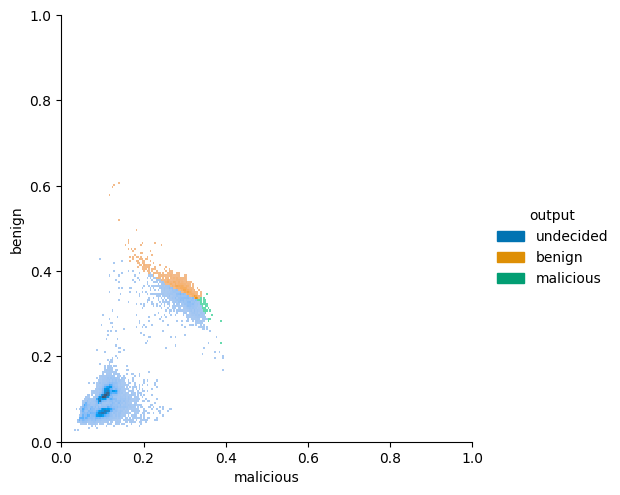

In [44]:
sns_plot = sns.displot(
    data=df.select("malicious", "benign", "output").to_pandas(),
    x="malicious",
    y="benign",
	hue="output",
	palette=sns.color_palette("colorblind", n_colors=3)
)
sns_plot.set(ylim=(0,1), xlim=(0,1))
print(sns_plot)

Somewhat, enlarged: (please, attention to the **axis**)

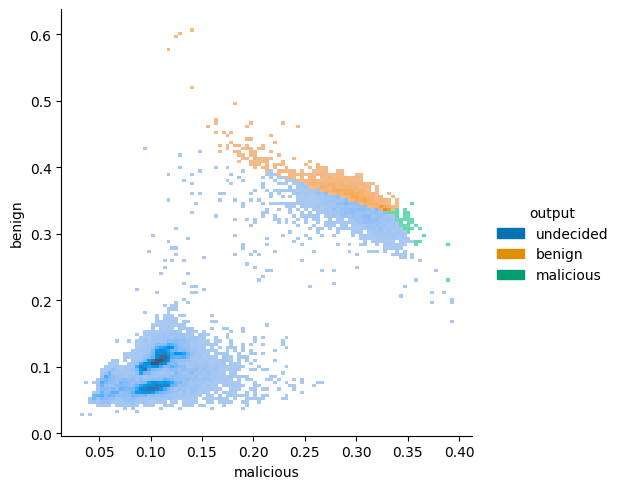

In [45]:
sns_plot = sns.displot(
    data=df.select("malicious", "benign", "output").to_pandas(),
    x="malicious",
    y="benign",
	hue="output",
	palette=sns.color_palette("colorblind", n_colors=3)
)
print(sns_plot)

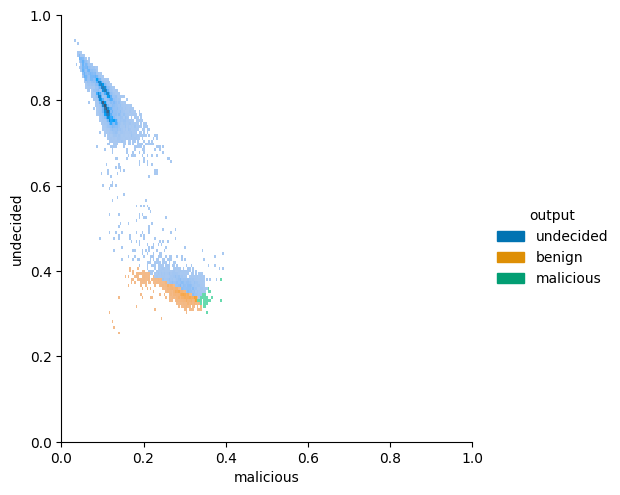

In [51]:
sns_plot = sns.displot(
    data=df.select("undecided", "malicious", "output").to_pandas(),
    x="malicious",
    y="undecided",
	hue="output",
    palette=sns.color_palette("colorblind", n_colors=3)
)

sns_plot.set(ylim=(0,1), xlim=(0,1))
print(sns_plot)

Even this time, we can better see when we zoom in. Please, attention to the axis shift.

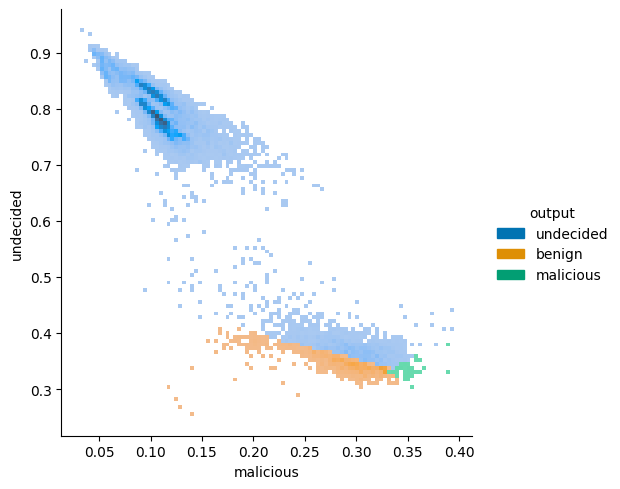

In [50]:
sns_plot = sns.displot(
    data=df.select("undecided", "malicious", "output").to_pandas(),
    x="malicious",
    y="undecided",
	hue="output",
    palette=sns.color_palette("colorblind", n_colors=3)
)
print(sns_plot)

And the last couple:

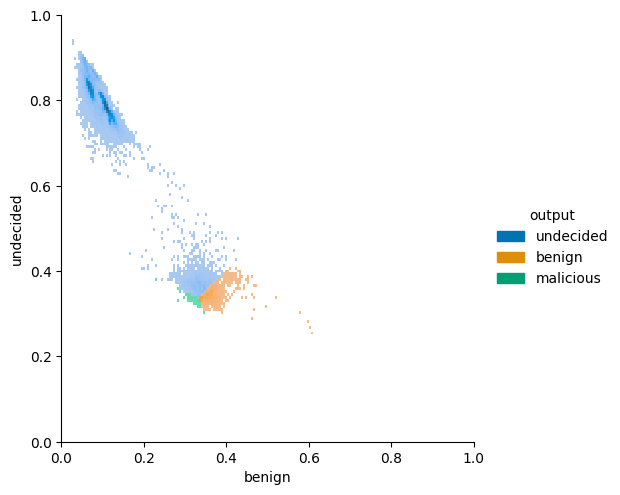

In [53]:

sns_plot = sns.displot(
    data=df.select("undecided", "benign", "output").to_pandas(),
    x="benign",
    y="undecided",
	hue="output",
    palette=sns.color_palette("colorblind", n_colors=3)
)

sns_plot.set(ylim=(0,1), xlim=(0,1))
print(sns_plot)

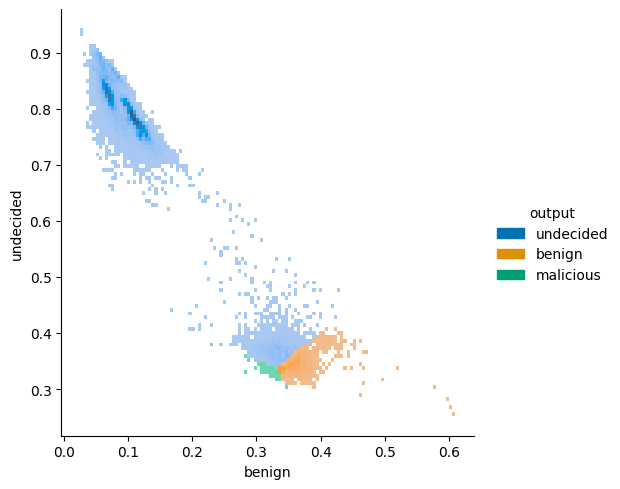

In [54]:
sns_plot = sns.displot(
    data=df.select("undecided", "benign", "output").to_pandas(),
    x="benign",
    y="undecided",
	hue="output",
    palette=sns.color_palette("colorblind", n_colors=3)
)
print(sns_plot)

In [55]:
# import plotly.express as px

# fig = px.scatter_3d(df.to_pandas(), x='malicious', y='benign', z='undecided', color="output")
# fig.show()
# This is the 3D interactive mode, not abilitated when pdf.
